# TD de machine Learning : Catégorisation musicale

**Elective** : Machine Learning   
**Professeur** : Théophile Ravillion   
**Date** : Vendredi 23 Avril 2021

## Etudiants : FOUR Sébastien, LECOMTE Louis

## Contexte 
Vous travaillez chez Deezer, département Data Science, félicitations.
D'habiles ingénieurs musicologues ont mis au point un jeu de données contenant des informations sur des morceaux de musique. 
Avec quelques transformées de Fourier et autres joyeusetés propres à leur art, ils ont mis au point deux jeux de données contenant de nombreux indicateurs décrivant un morceau de musique.
Ils comptent sur vous pour mettre au point un algorithme capable d'identifier le genre musical d'un morceau sur la base des différents indicateurs qu'ils ont mis au point.
Vous vous apprétiez à leur demander des informations concernant ces variables mais vous constatez qu'ils sont partis en séminaire d'entreprise et que vous vous retrouvez tout seul avec un jeu d'entrainement étiqueté, un jeu de test et un post-it goguenard de votre chef qui vous demande de faire des prédictions précises sur le jeu de test d'ici 16h.

## Votre défi :
Modéliser le problème, construire un modèle et faire une prédiction de la catégorie à laquelle appartient chaque élément du fichier test.csv à l'aide d'un modèle aussi simple et performant que possible.


## Livrable
Un projet github contenant un notebook + un fichier prédictions.csv contenant les prédictions faites sur le jeu de test

En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.
Merci d'utiliser la virgule comme séparateur 

Bonne chance !

# Notre solution :

## Récuperer les données 

In [39]:
import pandas as pd

url_train = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/test.csv"

df_train = pd.read_csv(url_train, sep=',', decimal='.' )
df_test = pd.read_csv(url_test, sep=',', decimal='.' )

target = df_train.category

df_train.drop('category', axis=1, inplace=True)
data = df_train

## Analyser les données  
Identifier la distribution de chaque variable  
Données manquantes    
Données aberrantes   
Données corrélées entre elles  

---------------------------------------------------------------------------
## I - Visualisation des jeux d'entrainement et des données utiles sous la forme d'un dataframe : 
### Jeu d'entrainement :

In [40]:
data.describe()

,music_id,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
count,320.000000,317.000000,317.000000,317.000000,317.000000,318.000000,320.000000,318.000000,319.000000,316.000000,...,314.000000,317.000000,319.000000,318.000000,316.000000,316.000000,320.000000,316.000000,316.000000,317.000000
mean,159.500000,461.223799,727.558402,441.424764,664.515463,420.808596,606.042905,417.116685,605.835885,469.942682,...,0.059404,0.629552,4.917406,28.050904,-0.155241,1.737679,1180.002741,1942.502831,192.060511,115.472340
std,92.520268,302.890638,511.932682,286.127709,507.650090,284.887311,443.484753,269.444492,410.002545,319.000592,...,0.279446,0.170709,2.537782,16.103779,0.185176,1.063592,711.314460,1984.500644,107.853027,53.495612
min,0.000000,52.542076,108.190132,66.789970,129.553772,64.062683,117.359634,50.826832,93.769897,50.655052,...,-0.850446,0.405036,0.366504,1.656318,-0.650820,0.351351,21.491228,41.709451,35.199924,32.996641
25%,79.750000,254.774170,388.372406,248.708359,350.873505,231.128601,344.294373,228.390095,353.000809,258.015579,...,-0.108972,0.515947,3.048645,16.354873,-0.287891,0.958037,687.719298,626.473435,114.992507,78.780289
50%,159.500000,377.393036,571.490845,381.081177,534.109131,340.970337,484.871140,354.934341,505.056274,403.037384,...,0.068480,0.583850,4.731231,24.205491,-0.086321,1.461911,1020.833333,1274.624056,167.636659,104.338107
75%,239.250000,592.239685,910.419189,558.673584,803.034241,506.674622,752.747421,507.147308,702.858398,568.195679,...,0.205802,0.683956,6.615188,37.958948,0.002296,2.144044,1552.741228,2634.940367,240.335595,142.303996
max,319.000000,1643.472900,3421.152100,2172.719482,4360.215332,2302.835205,5054.364258,1829.826904,3210.021484,2502.509033,...,1.985128,1.771815,14.466579,86.371120,0.074635,6.510337,5243.859649,15422.032531,579.817519,406.147341


### Jeu de test :

In [41]:
target.describe()

count    320.000000
mean       1.500000
std        1.119785
min        0.000000
25%        0.750000
50%        1.500000
75%        2.250000
max        3.000000
Name: category, dtype: float64

### Vérification des valeurs manquantes dans la base de données :

In [42]:
data.head(10)

,music_id,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
0,0,866.507629,1585.437134,415.300842,710.790771,683.865845,1011.552856,473.484100,744.247925,304.914825,...,0.156972,0.647313,3.631719,27.621587,-0.186330,1.962404,1525.877193,1579.021838,190.907164,149.482276
1,1,832.956909,2140.568115,287.584564,281.795380,405.467224,754.076904,1061.359863,2263.894531,2502.509033,...,-0.515713,0.575588,6.230564,38.780628,-0.013198,2.139456,1740.789474,1941.791036,257.913214,171.257592
2,2,331.544586,553.657532,260.467499,327.618225,283.580139,312.385986,204.369690,225.922531,286.470215,...,-0.002418,0.837297,4.264771,86.371120,-0.155013,1.336048,5243.859649,15422.032531,508.122337,296.141124
3,3,454.521851,1170.188110,601.021790,1035.021240,721.523865,1861.131836,350.991791,495.942383,432.551971,...,0.257047,0.702976,4.064860,16.844325,-0.287745,2.207420,988.596491,999.051613,144.638374,142.303996
4,4,180.331635,245.818512,388.924744,917.082581,186.856262,192.765305,212.240402,370.108063,170.875610,...,0.212848,0.487534,4.164816,5.764473,-0.626706,1.263404,21.491228,735.051431,181.818928,106.604597
5,5,623.636475,1185.141235,356.477631,438.765228,436.773651,584.193237,519.140076,607.874695,886.185425,...,-0.179700,0.817544,4.731231,33.695191,0.006474,1.644274,1310.964912,753.759663,179.852651,88.762234
6,6,202.341812,289.642334,154.299088,197.096191,175.142578,296.743988,127.823761,150.595825,NaN,...,0.113059,0.497695,3.298534,7.437169,-0.525607,0.579028,214.912281,544.688458,109.475711,37.981397
7,7,680.875793,521.657593,960.918823,1005.877625,722.886108,571.320068,680.045532,527.399902,1036.099731,...,0.384367,0.480489,6.996890,34.279457,-0.004662,2.157810,1031.578947,1667.802139,265.440200,119.720858
8,8,256.068146,419.610474,154.441422,241.447266,192.383408,342.736816,191.470200,264.553986,184.699219,...,0.042138,0.486629,4.233308,10.201029,-0.470241,1.461510,537.280702,1069.792914,135.532742,81.179168
9,9,681.930420,1243.771484,637.555603,874.287659,621.384094,916.178772,472.486176,832.650085,394.936432,...,0.273687,0.601287,5.264327,17.964051,0.002828,1.918716,580.263158,358.190976,113.107438,68.767890


### Observer une correlation entre les différentes features :

<AxesSubplot:>

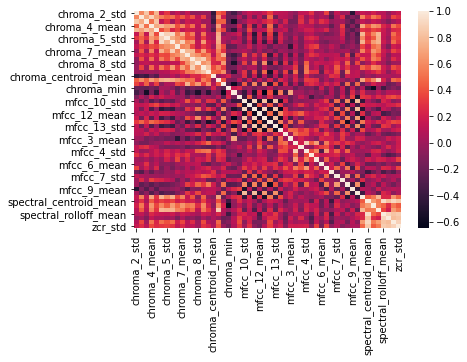

In [43]:
import seaborn as sns
# Observer la corrélation entre les différentes features
df_train_scaled = df_train.iloc[:30,10:] #Selection des colonnes du dataset qui nous interessent
correlation_matrix = df_train_scaled.corr().round(2)
sns.heatmap(correlation_matrix, annot = False)

### On remarque que le jeu d'entrainement comporte des cellules vides ce qui necessite l'imputation des valeurs manquante via la fonction KNNImputer : 

`class sklearn.impute.KNNImputer(*, missing_values=nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)`

### Jeu d'entrainement :

In [44]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
train_imputer = KNNImputer(n_neighbors=5,missing_values=nan)
data = train_imputer.fit_transform(data)

### Jeu de test :

In [45]:
#On sélectionne les six donnés les plus corrélées entre elles selon la matrice de corrélation
df_test = df_test[['onset_rate', 'mfcc_6_mean', 'mfcc_7_std', 'mfcc_8_std', 'mfcc_9_std', 'mfcc_10_std']]
#On remplace ensuite les valeurs manquante avec le KNN Imputer
test_imputer = KNNImputer(n_neighbors=5,missing_values=nan)
train_imputer.fit(df_test)
df_test = train_imputer.transform(df_test)

## Normaliser les données
Choisir une méthode de normalisation, comparer les résultats obtenus avec différentes méthodes 

### Boite à outils
  
Robust Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html   
StandardScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler         
MinMaxScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler      

## On commence par spliter les données en des jeux d'entrainement et de test distincts :
#### Création d'un échantillon non biaisé de validation :

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

## Banc d'essai : Test des différentes méthodes

### Cas du Robust Scaler :

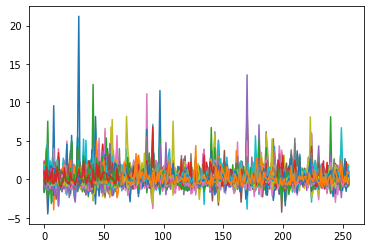

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

#Jeu d'entrainement
rb_scaler_train = RobustScaler()
rs_train = rb_scaler_train.fit_transform(x_train)
plt.plot(rs_train)

#Jeu de test
rb_scaler_test = RobustScaler().fit(x_test)
rs_test = rb_scaler_test.transform(x_test)
plt.plot(rs_test)

plt.show()

### Cas du Standard Scaler :

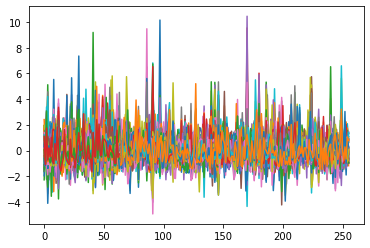

In [10]:
from sklearn.preprocessing import StandardScaler

#Jeu d'entrainement
std_scaler_train = StandardScaler().fit(x_train)
std_train = std_scaler_train.fit_transform(x_train)
plt.plot(std_train)

#Jeu de test
std_scaler_test = StandardScaler().fit(x_test)
std_test = std_scaler_test.transform(x_test)
plt.plot(std_test)

plt.show()

### Cas du Min Max Scaler :

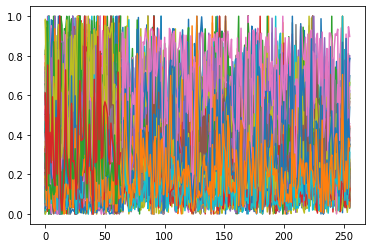

In [11]:
from sklearn.preprocessing import MinMaxScaler

#Jeu d'entrainement
mm_scaler_train = MinMaxScaler().fit(x_train)
mm_train = mm_scaler_train.fit_transform(x_train)
plt.plot(mm_train)

#Jeu de test
mm_scaler_test = MinMaxScaler().fit(x_test)
mm_test = mm_scaler_test.transform(x_test)
plt.plot(mm_test)

plt.show()

## Etudier l’opportunité d’une réduction de dimension
- Tester les perfs obtenus pour différentes valeurs
- Visualiser la variance expliquée par chaque axe
- Justifier le nombre d’axes retenus

### Boite à outils  
Analyse en composante principale : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html   

### Robust Scaler :

Robust Scaler train variance ratio: 0.6389252157772128
Robust Scaler test variance ratio: 0.7255004300268285


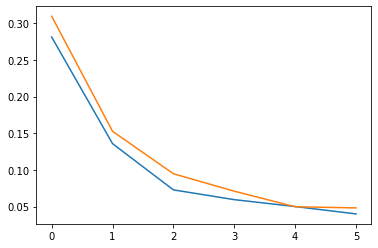

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)

#Robust Scaler Train
pca_train = pca.fit(rs_train)
rs_train_scaled = pca.transform(rs_train)
plt.plot(pca.explained_variance_ratio_)
print('Robust Scaler train variance ratio:', pca.explained_variance_ratio_.sum())

#Robust Scaler Test
pca_test = pca.fit(rs_test)
rs_test_scaled = pca.transform(rs_test)
plt.plot(pca.explained_variance_ratio_)
print('Robust Scaler test variance ratio:', pca.explained_variance_ratio_.sum())

plt.show()

### Standard Scaler :

Standard Scaler train variance ratio: 0.6246176079496232
Standard Scaler test variance ratio: 0.6627122682384682


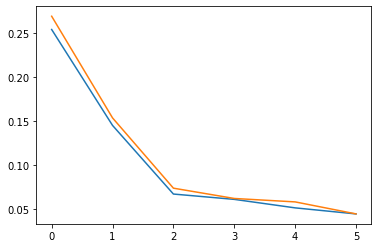

In [13]:
#Standard Scaler Train
pca_train = pca.fit(std_train)
std_train_scaled = pca.transform(std_train)
plt.plot(pca.explained_variance_ratio_)
print('Standard Scaler train variance ratio:', pca.explained_variance_ratio_.sum())

#Standard Scaler Test
pca_test = pca.fit(std_test)
std_test_scaled = pca.transform(std_test)
plt.plot(pca.explained_variance_ratio_)
print('Standard Scaler test variance ratio:', pca.explained_variance_ratio_.sum())

plt.show()

### MinMax Scaler :

Standard Scaler train variance ratio: 0.629651582688518
Standard Scaler test variance ratio: 0.6640194995249143


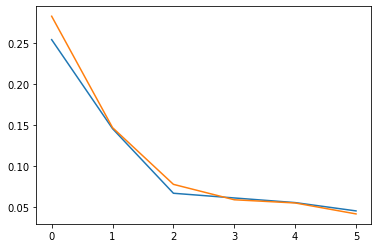

In [14]:
#MinMax Scaler Train
pca_test = pca.fit(mm_train)
mm_train_scaled = pca.transform(mm_train)
plt.plot(pca.explained_variance_ratio_)
print('Standard Scaler train variance ratio:', pca.explained_variance_ratio_.sum())

#MinMax Scaler Test
pca_train = pca.fit(mm_test)
mm_test_scaled = pca.transform(mm_test)
plt.plot(pca.explained_variance_ratio_)
print('Standard Scaler test variance ratio:', pca.explained_variance_ratio_.sum())

plt.show()

### On sélectionne le Standard Scaler pour notre jeu d'entrainement et de test pour la suite de notre td :

In [15]:
x_train = std_train_scaled 
x_test = std_test_scaled

## Entrainer différents algorithmes de classification

`model = ...`   
`model.fit(X_train, y_train)`

### Boite à outils  
SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html   
Random Forest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier   
Regression logistique : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html   

## Cas du SVM (SVC) :

In [16]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

model_SVC = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model_SVC.fit(x_train, y_train)
y_pred = model_SVC.predict(x_test)

## Cas du Random Forest Classifier :

In [17]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(max_depth=2, random_state=0)
model_RFC.fit(x_train, y_train)
y_pred = model_RFC.predict(x_test)

## Cas de la Regression Logistique :

In [18]:
from sklearn.linear_model import LogisticRegression

model_RL = LogisticRegression(random_state=0).fit(x_train, y_train)
model_RL.fit(x_train, y_train)
y_pred = model_RL.predict(x_test)

## Comparer la performance de différents algorithmes
Faire des prédictions et evaluer leur justesse de ces prédictions à l'aide de différents indicateurs :
- Matrice de confusion
- Accuracy
- F-Score

### Boite à outils  
Un rapport de performance clé en main : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html   

Liste des différents indicateurs : https://scikit-learn.org/stable/modules/model_evaluation.html

Faire une prédiction avec un model sklearn entrainé :
`y_pred_1 = model_1.predict(X_val, y_val)`   





### Rapport de performance :

In [19]:
from sklearn.metrics import classification_report

#Cas du SVC
y_pred_SVC = model_SVC.predict(x_test)
print(classification_report(y_pred_SVC, y_test))

              precision    recall  f1-score   support

           0       0.30      0.23      0.26        13
           1       0.12      0.25      0.16         8
           2       0.81      0.59      0.68        22
           3       0.62      0.62      0.62        21

    accuracy                           0.48        64
   macro avg       0.46      0.42      0.43        64
weighted avg       0.56      0.48      0.51        64



In [20]:
#Cas du RFC
y_pred_RFC = model_RFC.predict(x_test)
print(classification_report(y_pred_RFC, y_test))

              precision    recall  f1-score   support

           0       0.30      0.17      0.21        18
           1       0.06      0.08      0.07        12
           2       0.81      0.52      0.63        25
           3       0.38      0.89      0.53         9

    accuracy                           0.39        64
   macro avg       0.39      0.41      0.36        64
weighted avg       0.47      0.39      0.40        64



In [21]:
#Cas du RL
y_pred_RL = model_RL.predict(x_test)
print(classification_report(y_pred_RL, y_test))

              precision    recall  f1-score   support

           0       0.50      0.23      0.31        22
           1       0.18      0.25      0.21        12
           2       0.69      0.61      0.65        18
           3       0.48      0.83      0.61        12

    accuracy                           0.45        64
   macro avg       0.46      0.48      0.44        64
weighted avg       0.49      0.45      0.44        64



### Accuracy Score :

In [22]:
from sklearn.metrics import accuracy_score

#Cas du SVC
print('SVC accuracy score :', accuracy_score(y_pred_SVC, y_test))


SVC accuracy score : 0.484375


#### Nous pouvons constater que le score du SVC et de la Regression Logistique sont sensiblement plus elevé que le Random Forest Classifier nous les départagerons avec le F-Score

In [23]:
#Cas du RFC
print('Random Forest Classifier accuracy score :', accuracy_score(y_pred_RFC, y_test))

Random Forest Classifier accuracy score : 0.390625


In [24]:
#Cas du RL
print('Linear Regression accuracy score :', accuracy_score(y_pred_RL, y_test))

Linear Regression accuracy score : 0.453125


### F-Score :

In [25]:
from sklearn.metrics import f1_score
#Cas du SVC
f_ScoreSVC = f1_score(y_test, y_pred_SVC, average='weighted')
print('f_score_SVC :', f_ScoreSVC)

f_score_SVC : 0.4574385011441648


In [26]:
#Cas du RFC
f_ScoreRFC = f1_score(y_test, y_pred_RFC, average='weighted')
print('f_score_RFC :', f_ScoreRFC)

f_score_RFC : 0.38533769374023785


In [27]:
#Cas du RL
f_ScoreRL = f1_score(y_test, y_pred_RL, average='weighted')
print('f_score_RFC :', f_ScoreRL)

f_score_RFC : 0.4644133637977135


#### Le F-Score de la Regression Logistique étant plus élevé que celui du SVC nous retiendrons cet algorithme pour la suite du TD

### Confusion Matrix :

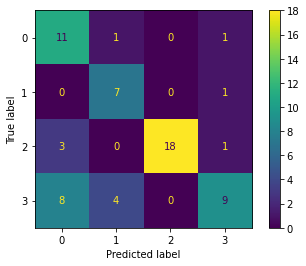

In [33]:
from sklearn.metrics import plot_confusion_matrix

#Cas de la Regression Logistique
plot_confusion_matrix(model_RL, x_test, y_pred_SVC)



## Optimiser les hyper-paramètres de l’algorithme retenu
Tester différents hyper-paramètres pour tirer au mieux partit de l'algorithme retenu

### Boite à outils  
GridSearchCV :  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



In [34]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

#Optimisation de la Regression Logistique
parameters = {'C':[1, 10]}
param_RL = LogisticRegression(random_state=0)
model = GridSearchCV(param_RL, parameters)
model.fit(x_train, y_train)
print('Logistic Regression best score :', model.best_score_)

Logistic Regression best score : 0.7228506787330318


## Prédire des valeurs pour le jeu de test 
Créer un fichier au format .csv contenant  vos prédictions.
En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.

Vérifier que votre notebook fonctionne avant de le rendre 

### Boite à outils  
exporter un dataFrame pandas au format csv :
`df_test.to_csv('data/test.csv' , sep=',', decimal='.')`

In [30]:
#Predictions Regression Logistique
model_RL = LogisticRegression(random_state=0)
model_RL.fit(x_train, y_train)
y_pred_RL = model_RL.predict(df_test)
print(y_pred_RL)

[3 3 3 3 3 3 3 2 3 3 3 1 3 2 3 3 3 2 3 3 1 2 3 3 2 3 3 2 3 2 3 3 2 3 3 2 3
 2 3 3 1 3 1 2 3 2 3 0 2 3 3 3 3 3 1 3 3 3 3 2 1 3 3 3 3 3 1 3 3 3 2 3 3 3
 3 3 2 3 3 3]


In [31]:
dfShape = range(0, df_test.shape[0])
dataFrame = pd.DataFrame({'music_id':dfShape,'prediction':y_pred_RL})
dataFrame.to_csv('predictions.csv', sep=',', decimal='.')
print(dataFrame)

    music_id  prediction
0          0           3
1          1           3
2          2           3
3          3           3
4          4           3
..       ...         ...
75        75           3
76        76           2
77        77           3
78        78           3
79        79           3

[80 rows x 2 columns]
